In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [3]:
# Carregar os dados

# Carregando o copnjunto de dados da pasta no google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carregar os dados
gluon_df = pd.read_csv('/content/drive/MyDrive/ML/Seminario/g_jets.csv', header=None, delimiter='\s+')
quark_df = pd.read_csv('/content/drive/MyDrive/ML/Seminario/q_jets.csv', header=None, delimiter='\s+')
top_df = pd.read_csv('/content/drive/MyDrive/ML/Seminario/t_jets.csv', header=None, delimiter='\s+')


In [5]:
# Verificar os nomes das colunas
print("Gluon columns:", gluon_df.columns)
print("Quark columns:", quark_df.columns)
print("Top columns:", top_df.columns)

Gluon columns: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
      dtype='int64', length=120)
Quark columns: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
      dtype='int64', length=120)
Top columns: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
      dtype='int64', length=120)


In [13]:
# Adicionar rótulos
gluon_df['label'] = 'gluon'
quark_df['label'] = 'quark'
top_df['label'] = 'top'

# Combinar os dados
data = pd.concat([gluon_df, quark_df, top_df], ignore_index=True)
print(data.columns)

# Selecionar todas as características e os rótulos
X = data.drop('label', axis=1)  # Todas as colunas exceto 'label'
y = data['label']

# Selecionar as colunas com base nos índices numéricos
particle_info = data.iloc[:, [0, 1, 2, 3]]

# Alternativamente, se as colunas que você deseja preservar estiverem em determinado intervalo de índices, você pode fazer algo como:
# particle_info = data.iloc[:, 0:4]

# Renomear as colunas, se necessário
particle_info.columns = ['eta_rel', 'phi_rel', 'pt_rel', 'mask']

# Exibir as primeiras linhas do DataFrame particle_info para verificar se os dados foram selecionados corretamente
print(particle_info.head())



Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           111,     112,     113,     114,     115,     116,     117,     118,
           119, 'label'],
      dtype='object', length=121)
    eta_rel   phi_rel    pt_rel  mask
0 -0.015134  0.004762  0.106951   1.0
1 -0.009041 -0.068467  0.132704   1.0
2 -0.014283  0.047580  0.108618   1.0
3  0.001965 -0.016335  0.175112   1.0
4 -0.041034  0.081199  0.179031   1.0


In [14]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test, particle_info_train, particle_info_test = train_test_split(X, y, particle_info, test_size=0.25, random_state=42)


In [15]:
# Definir as características e rótulos
X_train_features = particle_info_train[['eta_rel', 'phi_rel', 'pt_rel', 'mask']]
X_test_features = particle_info_test[['eta_rel', 'phi_rel', 'pt_rel', 'mask']]

# Pré-processar os dados de 'mask' para indicar se a partícula é real ou não
X_train_features['mask'] = X_train_features['mask'].apply(lambda x: 1 if x == 1 else 0)
X_test_features['mask'] = X_test_features['mask'].apply(lambda x: 1 if x == 1 else 0)

# Inicializar o modelo de Random Forest
clf = RandomForestClassifier(random_state=42)

# Treinar o modelo
clf.fit(X_train_features, y_train)

# Fazer previsões
y_pred = clf.predict(X_test_features)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.6343928987061589
              precision    recall  f1-score   support

       gluon       0.56      0.52      0.54     44387
       quark       0.66      0.61      0.63     42680
         top       0.68      0.77      0.72     44402

    accuracy                           0.63    131469
   macro avg       0.63      0.63      0.63    131469
weighted avg       0.63      0.63      0.63    131469



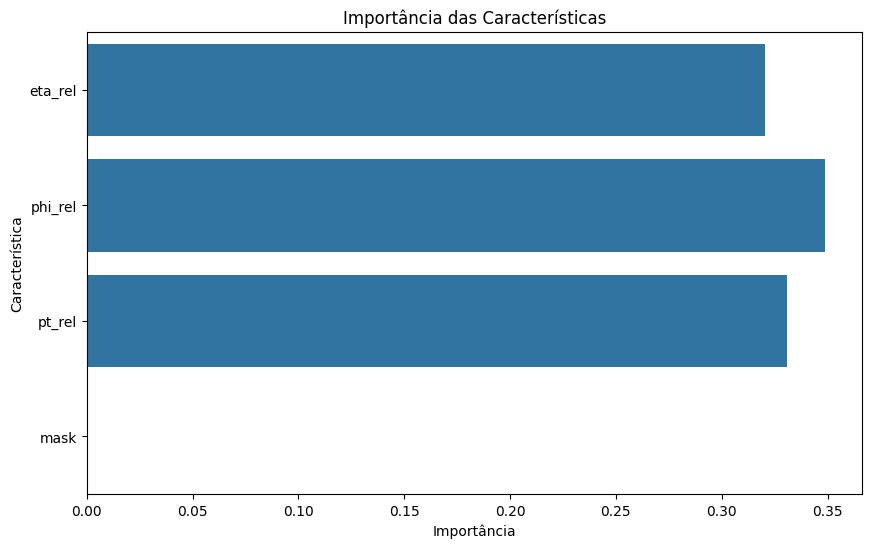

In [16]:
# Plot da importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.feature_importances_, y=X_train_features.columns)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()

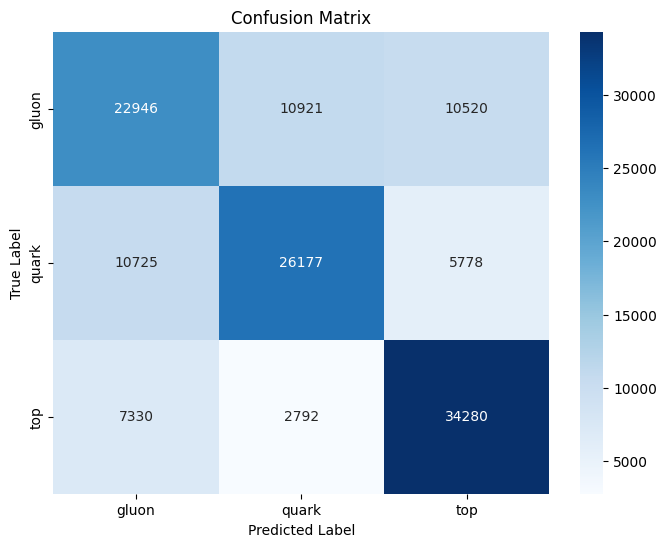

In [17]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

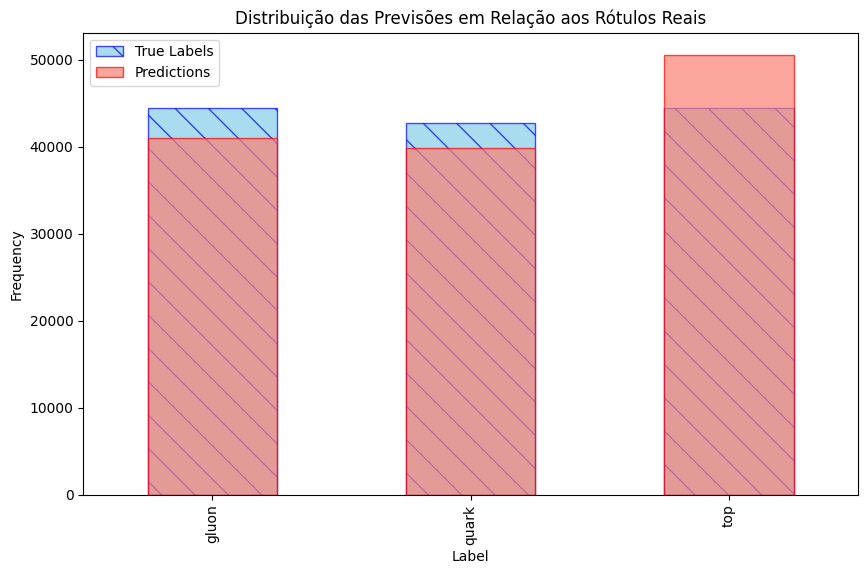

In [18]:
# Contar as ocorrências de cada classe nos rótulos reais e nas previsões
true_counts = y_test.value_counts()
pred_counts = pd.Series(y_pred).value_counts()

# Ordenar as séries por índice (classes)
true_counts = true_counts.sort_index()
pred_counts = pred_counts.sort_index()

# Plot da distribuição das previsões em relação aos rótulos reais
plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue', alpha=0.7, label='True Labels', hatch='\\', edgecolor='blue')
pred_counts.plot(kind='bar', color='salmon', alpha=0.7, label='Predictions', edgecolor='red')
plt.title('Distribuição das Previsões em Relação aos Rótulos Reais')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.legend()
plt.show()